In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import requests
from bs4 import BeautifulSoup

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import nltk.sentiment

from wordcloud import WordCloud
pd.set_option('display.max_colwidth', -1)
import re
from time import strftime

import unicodedata
import json
from pprint import pprint

# Turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

from PIL import Image

import acquire 
import prepare

In [ ]:
#acquire.scrape_github_data()

In [ ]:
#df = pd.DataFrame(acquire.scrape_github_data(), columns= ['repo', 'language', 'readme_contents'])
#df.head(10)

In [82]:
df = pd.read_csv('NLP.csv')
df.head()

Unnamed: 0                          repo    language  \
0  0           python-discord/bot            Python       
1  4           microsoft/BotBuilder-Samples  JavaScript   
2  5           GAwesomeBot/bot               JavaScript   
3  6           roughike/BottomBar            Java         
4  7           mithun-prasad/Bot             C#           

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [ ]:
### working on word clouds

In [3]:
df.head()

Unnamed: 0                          repo    language  \
0  0           python-discord/bot            Python       
1  4           microsoft/BotBuilder-Samples  JavaScript   
2  5           GAwesomeBot/bot               JavaScript   
3  6           roughike/BottomBar            Java         
4  7           mithun-prasad/Bot             C#           

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [83]:
df = df.reset_index().drop(columns = 'index')

In [ ]:
#train, validate, test = prepare.filter_data(df)

In [84]:
df.head()

Unnamed: 0                          repo    language  \
0  0           python-discord/bot            Python       
1  4           microsoft/BotBuilder-Samples  JavaScript   
2  5           GAwesomeBot/bot               JavaScript   
3  6           roughike/BottomBar            Java         
4  7           mithun-prasad/Bot             C#           

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [85]:
df.lemmatized.value_counts()

p aligncent img altviewcount srchttpsviewswhatilearenedtodayviewsgithubmshawonyoutubeviewersvg img alto srchttpsimgshieldsiobadgeoswindows2020linux macsuccess hrefhttpsgithubcommshawonyoutubeviewerreleasesimg altdownload srchttpsimgshieldsiogithubdownloadsmshawonyoutubeviewertotallabeldownloadscolorsuccessa hrefhttpsgithubcommshawonyoutubeviewerissuesqis3aissueis3aclosedimg altclos issu srchttpsimgshieldsiogithubissuesclosedmshawonyoutubeviewersvga hrefhttpsgithubcommshawonyoutubeviewerissuesqis3aissueis3aopenimg altopen issu srchttpsimgshieldsiogithubissuesmshawonyoutubeviewera p p aligncent hrefhttpsgithubcommshawonyoutubeviewerreleaseslatestimg altgithub releas latest date srchttpsimgshieldsiogithubvreleasemshawonyoutubeviewercolorsuccessa hrefhttpsgithubcommshawonyoutubeviewerreleaseslatestimg altgithub releas date srchttpsimgshieldsiogithubreleasedatemshawonyoutubeviewercolorsuccessa p yb dp dpyb 88 88 888888 88 88 88yb 888888 ybdp dp yb 88 88 88 88 88 88__dp 88__ 8p yb dp y8 8p 8

In [86]:
train, validate, test = prepare.split_data(df)
print ('train ===>', train.shape)
print ('validate ===>', validate.shape)
print('test===>', test.shape)

train ===> (127, 7)
validate ===> (55, 7)
test===> (46, 7)


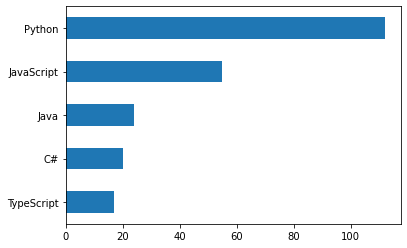

In [87]:
#bar on total dataset
df.language.value_counts().sort_values(ascending = True).plot.barh();


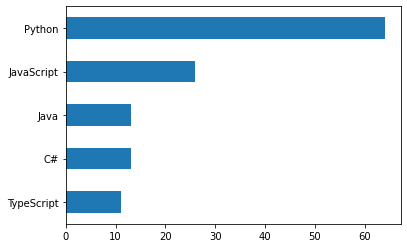

In [88]:
#bar on train dataset

train.language.value_counts().sort_values(ascending = True).plot.barh();

In [89]:
df.columns

Index(['Unnamed: 0', 'repo', 'language', 'readme_contents', 'clean', 'stemmed',
       'lemmatized'],
      dtype='object')

In [90]:
#creating word list:

train.dtypes

Unnamed: 0         int64 
repo               object
language           object
readme_contents    object
clean              object
stemmed            object
lemmatized         object
dtype: object

In [91]:
train.language.value_counts()

Python        64
JavaScript    26
C#            13
Java          13
TypeScript    11
Name: language, dtype: int64

In [ ]:
# def get_word_counts_series(df, column):
#     '''
#     This function takes in a dataframe
#     and the column you want to create the word counts of
#     returns a series of the words and their counts
#     You can get the top 20 or whatever from that later
#     '''
#     words = ' '.join(df[column])
    
#     words_list = words.split()
    
#     word_counts = pd.Series(words_list).value_counts()
    
#     return word_counts

In [92]:
train.columns

Index(['Unnamed: 0', 'repo', 'language', 'readme_contents', 'clean', 'stemmed',
       'lemmatized'],
      dtype='object')

In [93]:
list(train.language.unique())


['JavaScript', 'Python', 'TypeScript', 'C#', 'Java']

In [128]:
# combining the text strings for each language

# creating dfs
df_python = train[train.language == 'Python']
df_js = train[train.language == 'JavaScript']
df_java = train[train.language == 'Java']
df_c = train[train.language == 'C#']
df_type = train[train.language == 'TypeScript']
#all_words = train[train.language]

In [444]:
# generating text strings for each df
python_words = ' '.join(df_python.lemmatized.astype(str))
js_words = ' '.join(df_js.lemmatized.astype(str))
java_words = ' '.join(df_java.lemmatized.astype(str))
c_words = ' '.join(df_c.lemmatized.astype(str))
type_words = ' '.join(df_type.lemmatized.astype(str))
#all_words = ' '.join(all_words.lemmatized.astype(str))

In [445]:
# creating a df for the word count and frequency
# word count
df_python_count = pd.DataFrame(pd.Series(python_words.split()).value_counts(), columns = ['word_cnt']).head(20)
df_js_count = pd.DataFrame(pd.Series(js_words.split()).value_counts(), columns = ['word_cnt']).head(20)
df_java_count = pd.DataFrame(pd.Series(java_words.split()).value_counts(), columns = ['word_cnt']).head(20)
df_c_count = pd.DataFrame(pd.Series(c_words.split()).value_counts(), columns = ['word_cnt']).head(20)
df_type_count = pd.DataFrame(pd.Series(type_words.split()).value_counts(), columns = ['word_cnt']).head(20)


# word frequency
df_python_count['word_freq'] = pd.Series(python_words.split()).value_counts(normalize = True)
df_js_count['word_freq'] = pd.Series(js_words.split()).value_counts(normalize = True)
df_java_count['word_freq'] = pd.Series(java_words.split()).value_counts(normalize = True)
df_c_count['word_freq'] = pd.Series(c_words.split()).value_counts(normalize = True)
df_type_count['word_freq'] = pd.Series(type_words.split()).value_counts(normalize = True)

# df view
df_python_count

word_cnt  word_freq
bot      418       0.018825 
use      341       0.015358 
instal   264       0.011890 
python   248       0.011169 
file     213       0.009593 
run      159       0.007161 
support  139       0.006260 
account  130       0.005855 
option   117       0.005269 
user     117       0.005269 
get      116       0.005224 
creat    107       0.004819 
set      100       0.004504 
link     99        0.004459 
follow   94        0.004233 
default  94        0.004233 
want     92        0.004143 
command  88        0.003963 
servic   86        0.003873 
exampl   83        0.003738

In [460]:
#creating word strings
#all_words = ''.join(str(train.lemmatized))
python_words = ''.join(str(train[train.language == 'Python'].lemmatized))
javascript_words = ''.join(str(train[train.language == 'JavaScript'].lemmatized))
c_words = ''.join(str(train[train.language == 'C#'].lemmatized))
java_words = ''.join(str(train[train.language == 'Java'].lemmatized))
typescript_words = ''.join(str(train[train.language == 'TypeScript'].lemmatized))

In [461]:
### frequencies
#all_words = pd.Series(all_words.split()).value_counts()

python_words = pd.Series(python_words.split()).value_counts()
javascript_words = pd.Series(javascript_words.split()).value_counts()
c_words = pd.Series(c_words.split()).value_counts()
java_words = pd.Series(java_words.split()).value_counts()
typescript_words = pd.Series(typescript_words.split()).value_counts()


In [462]:
word_counts = pd.concat([python_words, javascript_words, c_words, java_words, typescript_words], axis=1).fillna(0).astype(int)
word_counts.columns = ['python_words', 'javascript_words', 'c_words', 'java_words', 'typescript_words']
word_counts['all_words'] = word_counts.sum(axis=1)
word_counts.head(20)

python_words  javascript_words  c_words  java_words  \
bot       100           226               144      20           
use       54            146               82       93           
instal    50            42                14       24           
user      42            46                26       10           
file      32            30                9        20           
telegram  28            3                 1        3            
get       27            38                18       13           
python    26            7                 0        1            
code      24            45                21       9            
command   24            18                5        0            
set       23            75                11       58           
snap      22            0                 0        0            
default   21            45                1        14           
pip       21            0                 0        0            
imag      21            5                 1        2            
support   20            30                35       23           
channel   19            20                5        0            
modul     19            8                 0        9            
run       19            40                15       10           
id        18            30                1        6            

          typescript_words  all_words  
bot       78                568        
use       38                413        
instal    35                165        
user      5                 129        
file      6                 97         
telegram  0                 35         
get       14                110        
python    0                 34         
code      15                114        
command   18                65         
set       5                 172        
snap      0                 22         
default   2                 83         
pip       0                 21         
imag      0                 29         
support   10                118        
channel   11                55         
modul     0                 36         
run       42                126        
id        7                 62

In [ ]:
# sequence item 105: expected str instance, float found


In [136]:
all_words.head(20)

bot         98
use         42
instal      38
build       30
botbuild    29
get         26
user        25
snap        22
azur        21
command     21
file        20
test        20
sdk         19
run         19
code        19
support     18
pip         17
default     16
sourc       16
set         15
dtype: int64

In [373]:
python_words = python_words.astype(object)
python_words

bot         100
use         54 
instal      50 
user        42 
file        32 
            .. 
cannot      1  
guarante    1  
older       1  
markdown    1  
object      1  
Length: 1173, dtype: object

<Figure size 1800x864 with 0 Axes>

<Figure size 1800x864 with 0 Axes>

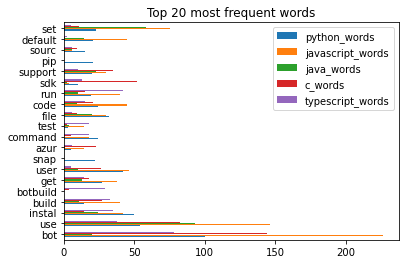

<Figure size 1800x864 with 0 Axes>

In [401]:
plt.figure(figsize=(25, 12))
plt.rc('font', size=10)
word_counts.sort_values('all_words', ascending=False).head(20)[['python_words', 'javascript_words', 'java_words', 'c_words','typescript_words']].plot.barh()
plt.title('Top 20 most frequent words')
plt.figure(figsize=(25, 12))



#database is unbalanced so be good to normalize it

In [418]:
all_words_list = ['python_words', 'javascript_words', 'c_words', 'java_words', 'typescript_words', 'all_words']
column_names = list(train.language.unique())
column_names.append('all')
languages = list(train.language.unique())

In [420]:
all_words_list

['python_words',
 'javascript_words',
 'c_words',
 'java_words',
 'typescript_words',
 'all_words']

In [ ]:
def git_logo(text):
    plt.figure(figsize=(16,9))
    mask = np.array(Image.open("images/github_logo.png"))
    wc = WordCloud(background_color="white", width=800, height=400, contour_width=1, contour_color='black',mask=mask)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

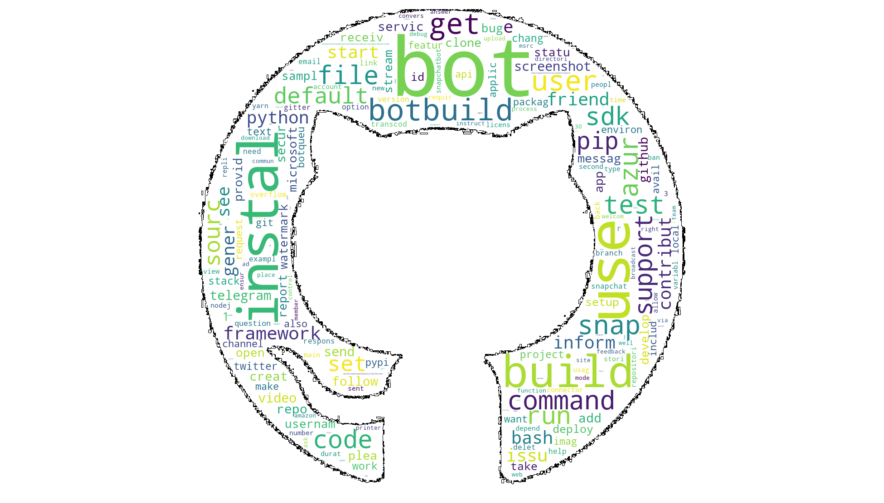

In [464]:
plt.figure(figsize=(16,9))
mask = np.array(Image.open("images/github_logo.png"))
wc = WordCloud(background_color="white", width=800, height=400, contour_width=1, contour_color='black',mask=mask)
    # generate word cloud
wc.generate_from_frequencies(all_words)

    # show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [458]:
def git_logo(text):
    plt.figure(figsize=(16,9))
    mask = np.array(Image.open("images/github_logo.png"))
    wc = WordCloud(background_color="white", width=800, height=400, contour_width=1, contour_color='black',mask=mask)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

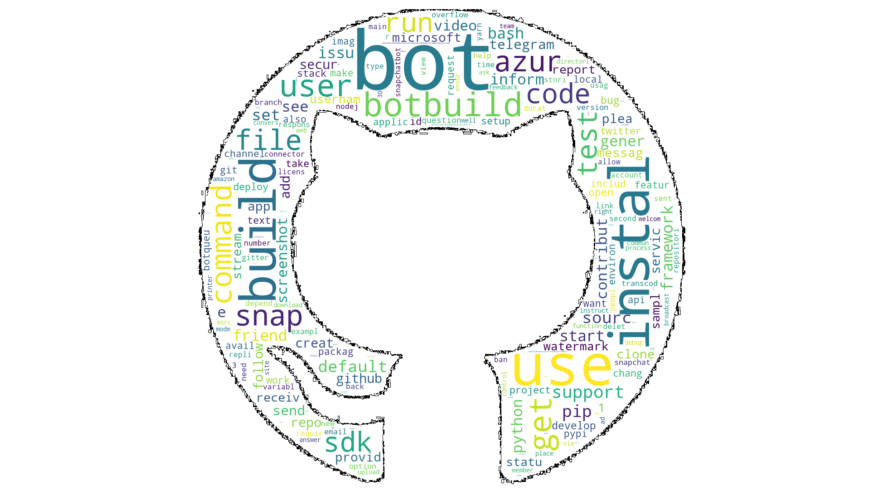

In [459]:
git_logo(all_words)

In [171]:
def c_logo(text):
    plt.figure(figsize=(16,9))
    mask = np.array(Image.open("images/c_logo.png"))

    wc = WordCloud(background_color="white", colormap = 'coolwarm',width=800, height=400, contour_width=1, contour_color='black',mask=mask)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc,)
    plt.axis("off")
    plt.show()

In [338]:
def java_logo(text):
    plt.figure(figsize=(16,9))
    mask = np.array(Image.open("images/java_logo2.png"))

    wc = WordCloud(background_color="white",width=800, height=400, contour_width=2, contour_color='black',mask=mask)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc,)
    plt.axis("off")
    plt.show()
    #, colormap = 'coolwarm'

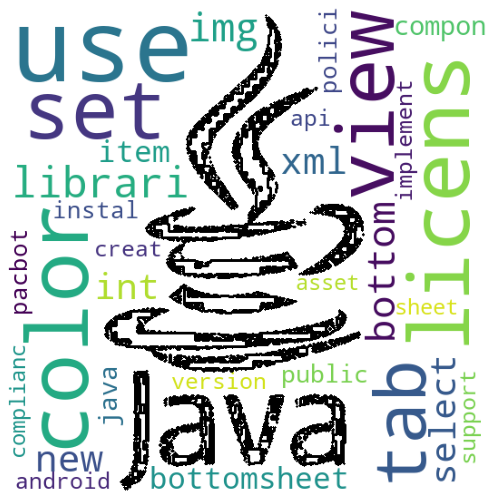

In [339]:
java_logo(java_words.head(30))

In [269]:
def js_logo(text):
    plt.figure(figsize=(16,9))
    mask = np.array(Image.open("images/js_logo.png"))

    wc = WordCloud(background_color="white", width=800, height=400, contour_width=2, contour_color='black',mask=mask)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc,)
    plt.axis("off")
    plt.show()

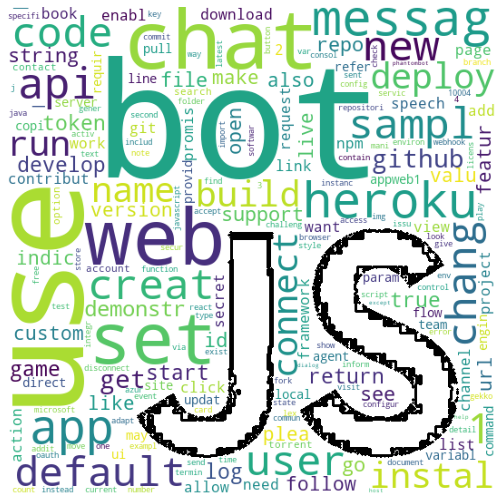

In [270]:
js_logo(javascript_words)

In [331]:
def c_logo(text):
    plt.figure(figsize=(16,9))
    mask = np.array(Image.open("images/c_logo_in.png"))

    wc = WordCloud(background_color="white", width=800, height=400, contour_width=15, contour_color='black',mask=mask)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

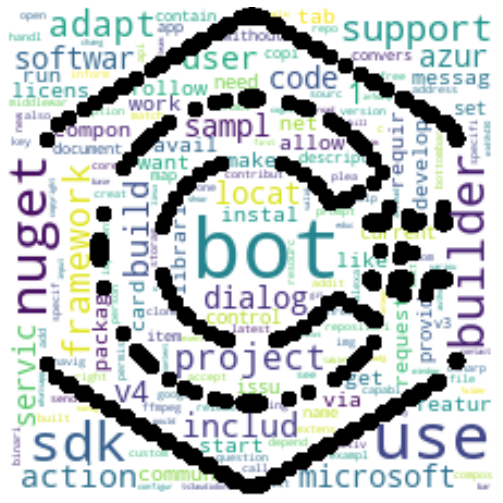

In [332]:
c_logo(c_words)

In [468]:
def python_logo(text):
    plt.figure(figsize=(16,9))
    mask = np.array(Image.open("images/python_inv.png"))
    wc = WordCloud(background_color="white", width=800, height=400, contour_width=1, contour_color='black',mask=mask)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

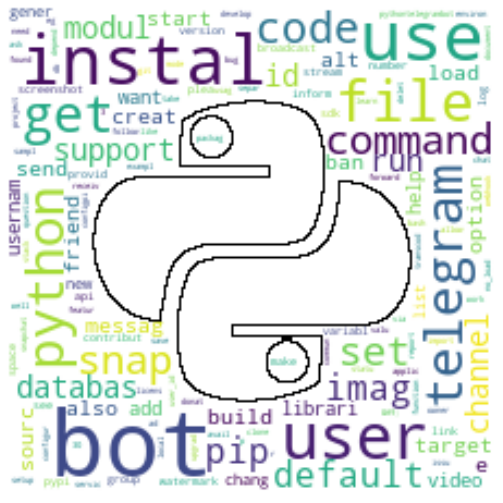

In [469]:
python_logo(word_counts['python_words'])

In [287]:
def ts_logo(text):
    plt.figure(figsize=(16,9))
    mask = np.array(Image.open("images/image (1).png"))
    wc = WordCloud(background_color="white", width=800, height=400, contour_width=3, contour_color='black',mask=mask)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

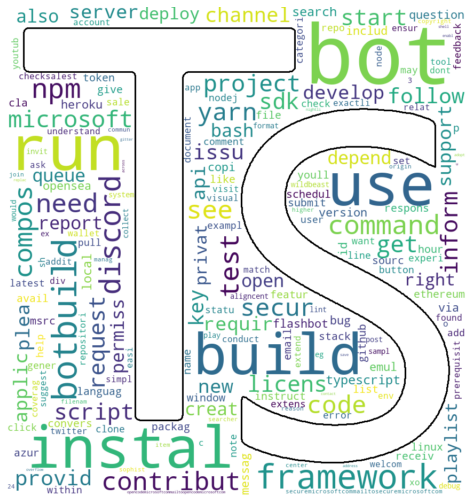

In [288]:
ts_logo(typescript_words)

# Modeling:

Transform your documents into a form that can be used in a machine learning model. You should use the programming language of the repository as the label to predict.

Try fitting several different models and using several different representations of the text (e.g. a simple bag of words, then also the TF-IDF values for each).

Build a function that will take in the text of a README file, and tries to predict the programming language.

Pathway to success???:
    - Review model exercises
    
    - Import everything
    
    - Repull data and perform X_train split funciton with target variable being language
    
    - Formulate code for TF-IDF
    
    - https://ds.codeup.com/nlp/model/#tf-idf
    
    - Relate to bag of words
    
    - Potentially run TF-IDF with Classification ML

In [556]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [726]:
#pull csv
df = pd.read_csv('NLP.csv')

#cleaning
df = df.reset_index().drop(columns = 'index')
df = prepare.filter_data(df)

### dropping these columns post cleaning as we will be focusing on lemmatized
columns_drop = ['readme_contents', 'clean', 'stemmed']
df = df.drop(columns_drop, 1)

train, validate, test = prepare.split_data(df)

#double checking
print ('train ===>', train.shape)
print ('validate ===>', validate.shape)
print('test===>', test.shape)

train ===> (126, 4)
validate ===> (54, 4)
test===> (45, 4)


In [699]:
# ### Add this function to model.py
# def split_xy(train, validate, test):
#     '''
#     Performs a train, validate, and test X/y split by dropping the target variable for X and setting it for y
#     this function is only for modeling
#     '''
#     X_train = train.drop(columns='language')
#     y_train = train.language

#     X_validate = validate.drop(columns='language')
#     y_validate = validate.language

#     X_test = test.drop(columns='language')
#     y_test = test.language

#     return train, X_train, y_train, X_validate, y_validate, X_test, y_test

In [727]:
### potentially using

def nlp_X_train_split(X_data, y_data):
    '''
    '''
    X_train_validate, X_test, y_train_validate, y_test = train_test_split(X_data, y_data, 
                                                                          stratify = y_data, 
                                                                          test_size=.2, random_state=123)
    
    X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, 
                                                                stratify = y_train_validate, 
                                                                test_size=.3, 
                                                                random_state=123)
    
    return X_train, y_train, X_validate, y_validate, X_test, y_test

In [700]:
#train, X_train, y_train, X_validate, y_validate, X_test, y_test = nlp_X_train_split(X_data, y_data)

In [728]:
### triple checkies
print ('X_train ===>', X_train.shape)
print ('X_validate ===>', X_validate.shape)
print('X_test===>', X_test.shape)
print ('y_train ===>', y_train.shape)
print ('y_validate ===>', y_validate.shape)
print('y_test===>', y_test.shape)

### be mindful that I might need to turn Ys into a dataframe

X_train ===> (70, 8257)
X_validate ===> (30, 8257)
X_test===> (26, 8257)
y_train ===> (70,)
y_validate ===> (30,)
y_test===> (26,)


In [729]:
#### BASELINE:
train[(train['language'] == 'Python')].count() / (train['language'].count()) * 100

# 53.17 target for baseline


Unnamed: 0    53.174603
repo          53.174603
language      53.174603
lemmatized    53.174603
dtype: float64

In [730]:
print(f'Baseline Accuracy: {round(max(train.language.value_counts()) / train.shape[0] *100)}%')


Baseline Accuracy: 53%


In [736]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(train.lemmatized)
y = train.language

#TF-IDF is simply the multiplication of the two metrics we've discussed above. Let's calculate an TF-IDF for all of the words and documents:

In [737]:
X_train, y_train, X_validate, y_validate, X_test, y_test = nlp_X_train_split(X, y)

In [707]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2)


### Logistic Regression TF-IDF

In [741]:
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))
test = pd.DataFrame(dict(actual=y_test))

lm = LogisticRegression().fit(X_train, y_train)

#form predictions
train['predicted'] = lm.predict(X_train)
validate['predicted'] = lm.predict(X_validate)
test['predicted'] = lm.predict(X_test)
print('Train Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted, train.actual))
print('---')
print(classification_report(train.actual, train.predicted))
print('----------------------------------------------')
print('Validate Performance: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(validate.predicted, validate.actual))
print('---')
print(classification_report(validate.actual, validate.predicted))

Train Accuracy: 71.43%
---
Confusion Matrix
actual      C#  Java  JavaScript  Python  TypeScript
predicted                                           
JavaScript  0   0     13          0       0         
Python      5   6     2           37      7         
---
              precision    recall  f1-score   support

          C#       0.00      0.00      0.00         5
        Java       0.00      0.00      0.00         6
  JavaScript       1.00      0.87      0.93        15
      Python       0.65      1.00      0.79        37
  TypeScript       0.00      0.00      0.00         7

    accuracy                           0.71        70
   macro avg       0.33      0.37      0.34        70
weighted avg       0.56      0.71      0.62        70

----------------------------------------------
Validate Performance: 53.33%
---
Confusion Matrix
actual     C#  Java  JavaScript  Python  TypeScript
predicted                                          
Python     2   3     6           16      3        

### Decision Tree TF-IDF (depth = 5)

In [791]:

train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))
test = pd.DataFrame(dict(actual=y_test))


tree = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
train['tree_predicted'] = tree.predict(X_train)
validate['tree_predicted'] = tree.predict(X_validate)
test['tree_predicted'] = tree.predict(X_test)

print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.tree_predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.tree_predicted, train.actual))
print('---')
print(classification_report(train.actual, train.tree_predicted))
print('----------------------------------------------')
print('Validate Performance: {:.2%}'.format(accuracy_score(validate.actual, validate.tree_predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(validate.tree_predicted, validate.actual))
print('---')
print(classification_report(validate.actual, validate.tree_predicted))

Accuracy: 90.00%
---
Confusion Matrix
actual          C#  Java  JavaScript  Python  TypeScript
tree_predicted                                          
C#              4   1     0           1       0         
Java            0   4     0           0       0         
JavaScript      0   0     14          0       0         
Python          1   1     0           36      2         
TypeScript      0   0     1           0       5         
---
              precision    recall  f1-score   support

          C#       0.67      0.80      0.73         5
        Java       1.00      0.67      0.80         6
  JavaScript       1.00      0.93      0.97        15
      Python       0.90      0.97      0.94        37
  TypeScript       0.83      0.71      0.77         7

    accuracy                           0.90        70
   macro avg       0.88      0.82      0.84        70
weighted avg       0.91      0.90      0.90        70

----------------------------------------------
Validate Performance: 5

### Random Forest TF-IDF

In [767]:
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))
test = pd.DataFrame(dict(actual=y_test))

rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_train)



# train['forest_predicted'] = forest.predict(X_train)
# validate['forest_predicted'] = forest.predict(X_validate)
# test['forest_predicted'] = forest.predict(X_test)
# print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.forest_predicted)))
# print('---')
# print('Confusion Matrix')
# print(pd.crosstab(train.forest_predicted, train.actual))
# print('---')
# print(classification_report(train.actual, train.forest_predicted))
# print('----------------------------------------------')
# print('Validate Performance: {:.2%}'.format(accuracy_score(validate.actual, validate.forest_predicted)))
# print('---')
# print('Confusion Matrix')
# print(pd.crosstab(validate.forest_predicted, validate.actual))
# print('---')
# print(classification_report(validate.actual, validate.forest_predicted))




#Evaluate
print('In-sample data model performance:')
#print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.forest_predicted)))
print(classification_report(y_train, y_pred))

#Predict using out of sample data
y_pred = rf.predict(X_validate)
print('----------------')
print('Out-of-sample data model performance:')
print(classification_report(y_validate, y_pred, zero_division=0))

In-sample data model performance:
              precision    recall  f1-score   support

          C#       0.00      0.00      0.00         5
        Java       0.00      0.00      0.00         6
  JavaScript       1.00      0.20      0.33        15
      Python       0.55      1.00      0.71        37
  TypeScript       0.00      0.00      0.00         7

    accuracy                           0.57        70
   macro avg       0.31      0.24      0.21        70
weighted avg       0.51      0.57      0.45        70

----------------
Out-of-sample data model performance:
              precision    recall  f1-score   support

          C#       0.00      0.00      0.00         2
        Java       0.00      0.00      0.00         3
  JavaScript       0.00      0.00      0.00         6
      Python       0.53      1.00      0.70        16
  TypeScript       0.00      0.00      0.00         3

    accuracy                           0.53        30
   macro avg       0.11      0.20      0.1

### Random Forest

In [755]:
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))
test = pd.DataFrame(dict(actual=y_test))


forest = RandomForestClassifier(min_samples_leaf = 1, max_depth = 5, random_state= 123).fit(X_train, y_train)



train['forest_predicted'] = forest.predict(X_train)
validate['forest_predicted'] = forest.predict(X_validate)
test['forest_predicted'] = forest.predict(X_test)

print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.forest_predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.forest_predicted, train.actual))
print('---')
print(classification_report(train.actual, train.forest_predicted))
print('----------------------------------------------')
print('Validate Performance: {:.2%}'.format(accuracy_score(validate.actual, validate.forest_predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(validate.forest_predicted, validate.actual))
print('---')
print(classification_report(validate.actual, validate.forest_predicted))

Accuracy: 77.14%
---
Confusion Matrix
actual            C#  Java  JavaScript  Python  TypeScript
forest_predicted                                          
C#                4   0     0           0       0         
Java              0   2     0           0       0         
JavaScript        0   0     9           0       0         
Python            1   4     6           37      5         
TypeScript        0   0     0           0       2         
---
              precision    recall  f1-score   support

          C#       1.00      0.80      0.89         5
        Java       1.00      0.33      0.50         6
  JavaScript       1.00      0.60      0.75        15
      Python       0.70      1.00      0.82        37
  TypeScript       1.00      0.29      0.44         7

    accuracy                           0.77        70
   macro avg       0.94      0.60      0.68        70
weighted avg       0.84      0.77      0.75        70

----------------------------------------------
Validate 

# Bag of Words:

In [794]:
#pull csv
df = pd.read_csv('NLP.csv')

#cleaning
df = df.reset_index().drop(columns = 'index')
df = prepare.filter_data(df)

### dropping these columns & splitting data
columns_drop = ['readme_contents', 'clean', 'stemmed']
df = df.drop(columns_drop, 1)
train, validate, test = prepare.split_data(df)
###

# Count Vectorizer using bag of words - defining X & y variables
cv = CountVectorizer()
X_bag_of_words = cv.fit_transform(train.lemmatized)
y = train.language

# function as above
X_train, y_train, X_validate, y_validate, X_test, y_test = nlp_X_train_split(X, y)

In [795]:
## yep yep yep
X_bag_of_words.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [796]:
# Shows the column location of each word
cv.vocabulary_

{'discord': 2398,
 'bot': 1232,
 'github': 3224,
 'version': 7861,
 '100': 36,
 'display': 2436,
 'notif': 5245,
 'channel': 1642,
 'select': 6474,
 'event': 2765,
 'trigger': 7543,
 'utilis': 7808,
 'webhook': 7976,
 'secret': 6462,
 'secur': 6467,
 'updat': 7700,
 'privat': 5759,
 'public': 5834,
 'repositori': 6197,
 'setup': 6575,
 'add': 556,
 'point': 5646,
 'httpsdiscordbotgithubherokuappcom': 3712,
 'would': 8137,
 'like': 4586,
 'listen': 4616,
 'visit': 7915,
 'githubcom': 3228,
 'click': 1754,
 'set': 6545,
 'tab': 7211,
 'content': 1983,
 'type': 7615,
 'applicationjson': 842,
 'authoris': 959,
 'server': 6512,
 'linkhttpsdiscordcomapioauth2authorizeclient_id193000403632128013permissions18432scopebot20applicationscommand': 4600,
 'activ': 542,
 'use': 7742,
 'slash': 6689,
 'command': 1846,
 'list': 4614,
 'specifi': 6796,
 'valu': 7837,
 'subscrib': 7156,
 'receiv': 6074,
 'keep': 4428,
 'mind': 4892,
 'store': 7080,
 'plain': 5619,
 'text': 7316,
 'somewher': 6766,
 'dont

In [798]:
#fancy
bow = pd.DataFrame(X_bag_of_words.todense(), columns=cv.get_feature_names())
bow

00  000  0000  000012102  00005432  000081740  000102128  000114807  \
0    0   0    0     0          0         0          0          0           
1    0   0    0     0          0         0          0          0           
2    0   0    0     0          0         0          0          0           
3    0   0    0     0          0         0          0          0           
4    0   0    0     0          0         0          0          0           
..  ..  ..   ..    ..         ..        ..         ..         ..           
121  0   0    0     0          0         0          0          0           
122  0   0    0     0          0         0          0          0           
123  0   0    0     0          0         0          0          0           
124  0   0    0     0          0         0          0          0           
125  0   0    0     0          0         0          0          0           

     000827589  001  ...  zeach  zero  zevtyardthttpsgithubcomzevtyardt  \
0    0          0    ...  0      0     0                                  
1    0          0    ...  0      0     0                                  
2    0          0    ...  0      0     0                                  
3    0          0    ...  0      0     0                                  
4    0          0    ...  0      0     0                                  
..  ..         ..    ... ..     ..    ..                                  
121  0          0    ...  0      0     0                                  
122  0          0    ...  0      0     0                                  
123  0          0    ...  0      0     0                                  
124  0          0    ...  0      0     0                                  
125  0          0    ...  0      0     0                                  

     zh_cn  zip  zip_code90712  zippyshar  zipwatch  zlibdev  zone  
0    0      0    0              0          0         0        0     
1    0      0    0              0          0         0        0     
2    0      0    0              0          0         0        0     
3    0      0    0              0          0         0        0     
4    0      0    0              0          0         0        0     
..  ..     ..   ..             ..         ..        ..       ..     
121  0      0    0              0          0         0        0     
122  0      0    0              0          0         0        0     
123  0      0    0              0          0         0        0     
124  0      0    0              0          0         0        0     
125  0      0    0              0          0         0        0     

[126 rows x 8257 columns]

### Logistic Regression Bag of Words

In [801]:
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))
test = pd.DataFrame(dict(actual=y_test))

lm = LogisticRegression().fit(X_train, y_train)

#form predictions
train['predicted'] = lm.predict(X_train)
validate['predicted'] = lm.predict(X_validate)
test['predicted'] = lm.predict(X_test)
print('Train Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted, train.actual))
print('---')
print(classification_report(train.actual, train.predicted))
print('----------------------------------------------')
print('Validate Performance: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(validate.predicted, validate.actual))
print('---')
print(classification_report(validate.actual, validate.predicted))

Train Accuracy: 69.00%
---
Confusion Matrix
actual      C#  Java  JavaScript  Python  TypeScript
predicted                                           
JavaScript  0   0     16          0       0         
Python      7   9     5           53      10        
---
              precision    recall  f1-score   support

          C#       0.00      0.00      0.00         7
        Java       0.00      0.00      0.00         9
  JavaScript       1.00      0.76      0.86        21
      Python       0.63      1.00      0.77        53
  TypeScript       0.00      0.00      0.00        10

    accuracy                           0.69       100
   macro avg       0.33      0.35      0.33       100
weighted avg       0.54      0.69      0.59       100

----------------------------------------------
Validate Performance: 66.67%
---
Confusion Matrix
actual      C#  Java  JavaScript  Python  TypeScript
predicted                                           
JavaScript  0   0     4           0       0     

In [653]:
print('Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(test.predicted, test.actual))
print('---')
print(classification_report(test.actual, test.predicted))

Accuracy: 53.85%
---
Confusion Matrix
actual     C#  Java  JavaScript  Python  TypeScript
predicted                                          
Python     2   2     6           14      2         
---
              precision    recall  f1-score   support

          C#       0.00      0.00      0.00         2
        Java       0.00      0.00      0.00         2
  JavaScript       0.00      0.00      0.00         6
      Python       0.54      1.00      0.70        14
  TypeScript       0.00      0.00      0.00         2

    accuracy                           0.54        26
   macro avg       0.11      0.20      0.14        26
weighted avg       0.29      0.54      0.38        26



### Bag of Words Decision Tree (depth = 5)

In [804]:

train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))
test = pd.DataFrame(dict(actual=y_test))


tree = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
train['tree_predicted'] = tree.predict(X_train)
validate['tree_predicted'] = tree.predict(X_validate)
test['tree_predicted'] = tree.predict(X_test)

print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.tree_predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.tree_predicted, train.actual))
print('---')
print(classification_report(train.actual, train.tree_predicted))
print('----------------------------------------------')
print('Validate Performance: {:.2%}'.format(accuracy_score(validate.actual, validate.tree_predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(validate.tree_predicted, validate.actual))
print('---')
print(classification_report(validate.actual, validate.tree_predicted))

Accuracy: 90.00%
---
Confusion Matrix
actual          C#  Java  JavaScript  Python  TypeScript
tree_predicted                                          
C#              5   2     0           0       1         
Java            0   6     0           0       0         
JavaScript      1   0     19          0       2         
Python          0   1     2           53      0         
TypeScript      1   0     0           0       7         
---
              precision    recall  f1-score   support

          C#       0.62      0.71      0.67         7
        Java       1.00      0.67      0.80         9
  JavaScript       0.86      0.90      0.88        21
      Python       0.95      1.00      0.97        53
  TypeScript       0.88      0.70      0.78        10

    accuracy                           0.90       100
   macro avg       0.86      0.80      0.82       100
weighted avg       0.90      0.90      0.90       100

----------------------------------------------
Validate Performance: 7

### Random Forest Bag of Words
    - play with max_depth

In [808]:
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))
test = pd.DataFrame(dict(actual=y_test))


forest = RandomForestClassifier(min_samples_leaf = 1, max_depth = 8, random_state= 123).fit(X_train, y_train)



train['forest_predicted'] = forest.predict(X_train)
validate['forest_predicted'] = forest.predict(X_validate)
test['forest_predicted'] = forest.predict(X_test)

print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.forest_predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.forest_predicted, train.actual))
print('---')
print(classification_report(train.actual, train.forest_predicted))
print('----------------------------------------------')
print('Validate Performance: {:.2%}'.format(accuracy_score(validate.actual, validate.forest_predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(validate.forest_predicted, validate.actual))
print('---')
print(classification_report(validate.actual, validate.forest_predicted))

Accuracy: 91.00%
---
Confusion Matrix
actual            C#  Java  JavaScript  Python  TypeScript
forest_predicted                                          
C#                7   0     0           0       0         
Java              0   6     0           0       0         
JavaScript        0   0     17          0       0         
Python            0   3     4           53      2         
TypeScript        0   0     0           0       8         
---
              precision    recall  f1-score   support

          C#       1.00      1.00      1.00         7
        Java       1.00      0.67      0.80         9
  JavaScript       1.00      0.81      0.89        21
      Python       0.85      1.00      0.92        53
  TypeScript       1.00      0.80      0.89        10

    accuracy                           0.91       100
   macro avg       0.97      0.86      0.90       100
weighted avg       0.92      0.91      0.91       100

----------------------------------------------
Validate 

In [538]:
#### BASELINE:
train[(train['language'] == 'Python')].count() / (train['language'].count()) * 100

# 53.17 target for baseline


Unnamed: 0    53.174603
repo          53.174603
language      53.174603
lemmatized    53.174603
dtype: float64

In [554]:
print(f'Baseline Accuracy: {round(max(train.language.value_counts()) / train.shape[0] *100)}%')


Baseline Accuracy: 53%


In [558]:
X_train

Unnamed: 0                                               repo  \
213  545         Falconerd/discord-bot-github                        
123  326         edwardhdlu/q-trader                                 
95   241         rmmh/skybot                                         
99   246         souravkl11/Raganork                                 
222  580         botgram/botgram                                     
..   ...                     ...                                     
114  290         bananiumbot/bot                                     
50   121         jef/streetmerchant                                  
205  528         cesardeazevedo/react-native-bottom-sheet-behavior   
66   168         OfficeDev/BotBuilder-MicrosoftTeams                 
131  341         jesse-ai/jesse                                      

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [540]:
score_df = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])


In [544]:
model_list = [MultinomialNB(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()]
model_names = ['Naive_Bayes_tfidf','Decision_tree_tfidf', 'Random_forest_tfidf', 'KNN_tfidf']
language_names = ['Python', 'JavaScript', 'TypeScript', 'Java', 'C#']

In [561]:
lm = LogisticRegression()
lm.fit(X_train, y_train)


ValueError: could not convert string to float: 'Falconerd/discord-bot-github'

SyntaxError: invalid syntax (<ipython-input-563-7e3cde8bd64d>, line 12)

In [557]:
#Using the vectorized data, make a logistic regression model
lm = LogisticRegression()

#Fit the lm object to the vectorized data
lm.fit(X_train, y_train)

#Create corresponding dataframes for the actual values of the categories that correspond to each article
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))
test = pd.DataFrame(dict(actual=y_test))

#Form predictions uisng the lm model
train['predicted'] = lm.predict(X_train)
validate["predicted"] = lm.predict(X_validate)
test['predicted'] = lm.predict(X_test)

#Review how the lm model performed on the in-sample data
print('In-sample data model performance:')
print(classification_report(train.actual, train.predicted, zero_division=0))
print('----------------')
#Review how the lm model performed on the out-of-sample data
print('Out-of-sample data model performance:')
print(classification_report(validate.actual, validate.predicted, zero_division=0))

ValueError: could not convert string to float: 'Falconerd/discord-bot-github'

In [548]:
def test_a_model(X_train, y_train, X_validate, y_validate, model, model_name, score_df):
    '''
    Function takes in X and y train
    X and y validate (or test) 
    A model with it's hyper parameters
    And a df to store the scores 
    - Set up an empty dataframe with score_df first
    - score_df = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])
    '''
    this_model = model

    this_model.fit(X_train, y_train)

    # Check with Validate

    train_score = this_model.score(X_train, y_train)
    
    validate_score = this_model.score(X_validate, y_validate)
    
    model_dict = {'model_name': model_name, 
                  'train_score': train_score, 
                  'validate_score':validate_score}
    score_df = score_df.append(model_dict, ignore_index = True)
    
    return score_df

In [547]:
score_df = test_a_model(X_train, y_train, X_validate, y_validate, model, name, score_df)

NameError: name 'model' is not defined

In [ ]:
# Modeling
# bag of words
#naive based classifier

In [473]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()


In [482]:
bag_of_words = cv.fit_transform(train['lemmatized'])
#y = df.label

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [477]:
bag_of_words.todense()

matrix([[0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0]])

In [478]:
cv.get_feature_names()

['all_words',
 'clean',
 'language',
 'lemmatized',
 'readme_contents',
 'repo',
 'stemmed',
 'unnamed']

#### Looking at the first ten repos and pushed into a dataframe


#### likely will need:
    - value counts for language
    - set top value (4-6)
    - bar plot of counts
    - drop nulls
    - filter for english
    - split data (requirement)
#### exploration:
    - lemmatize data ***
    - find common words 
    - explore findings
    
    - Bigrams + word clouds
    - Trigrams + word clouds
    - Takeaways
    
#### modeling:
    - Try various classification modeling 
    - 

In [ ]:
df = prepare.prep_article_data(df)

In [ ]:
df.shape

In [ ]:
train, validate, test = prepare.filter_data(df)

In [ ]:
train.shape

In [ ]:
#def prep_article_data(df, column, extra_words=[], exclude_words=[]):

In [ ]:
# def basic_clean(string):
#     '''
#     This function takes in a string and
#     returns the string normalized.
#     '''
#     string = unicodedata.normalize('NFKD', string)\
#             .encode('ascii', 'ignore')\
#             .decode('utf-8', 'ignore')
#     string = re.sub(r'[^\w\s]', '', string).lower()
#     return string



# def tokenize(string):
#     '''
#     This function takes in a string and
#     returns a tokenized string.
#     '''
#     # Create tokenizer.
#     tokenizer = nltk.tokenize.ToktokTokenizer()
    
#     # Use tokenizer
#     string = tokenizer.tokenize(string, return_str = True)
    
#     return string




# def stem(string):
#     '''
#     This function takes in a string and
#     returns a string with words stemmed.
#     '''
#     # Create porter stemmer.
#     ps = nltk.porter.PorterStemmer()
    
#     # Use the stemmer to stem each word in the list of words we created by using split.
#     stems = [ps.stem(word) for word in string.split()]
    
#     # Join our lists of words into a string again and assign to a variable.
#     string = ' '.join(stems)
    
#     return string




# def lemmatize(string):
#     '''
#     This function takes in string for and
#     returns a string with words lemmatized.
#     '''
#     # Create the lemmatizer.
#     wnl = nltk.stem.WordNetLemmatizer()
    
#     # Use the lemmatizer on each word in the list of words we created by using split.
#     lemmas = [wnl.lemmatize(word) for word in string.split()]
    
#     # Join our list of words into a string again and assign to a variable.
#     string = ' '.join(lemmas)
    
#     return string




# def remove_stopwords(string, extra_words=[], exclude_words=[]):
#     '''
#     This function takes in a string, optional extra_words and exclude_words parameters
#     with default empty lists and returns a string.
#     '''
#     # Create stopword_list.
#     stopword_list = stopwords.words('english')
    
#     # Remove 'exclude_words' from stopword_list to keep these in my text.
#     stopword_list = set(stopword_list) - set(exclude_words)
    
#     # Add in 'extra_words' to stopword_list.
#     stopword_list = stopword_list.union(set(extra_words))

#     # Split words in string.
#     words = string.split()
    
#     # Create a list of words from my string with stopwords removed and assign to variable.
#     filtered_words = [word for word in words if word not in stopword_list]
    
#     # Join words in the list back into strings and assign to a variable.
#     string_without_stopwords = ' '.join(filtered_words)
    
#     return string_without_stopwords



# def prep_article_data(df, column = 'readme_contents', extra_words=[], exclude_words=[]):
#     '''
#     This function take in a df and the string name for a text column with 
#     option to pass lists for extra_words and exclude_words and
#     returns a df with the text article title, original text, stemmed text,
#     lemmatized text, cleaned, tokenized, & lemmatized text with stopwords removed.
#     '''
#     df['clean'] = df[column].apply(basic_clean)\
#                             .apply(tokenize)\
#                             .apply(remove_stopwords, 
#                                 extra_words=extra_words, 
#                                 exclude_words=exclude_words)
    
#     df['stemmed'] = df['clean'].apply(stem)
#     df['lemmatized'] = df['stemmed'].apply(lemmatize)
    
# #     df[column].apply(basic_clean)\
# #                             .apply(tokenize)\
# #                             .apply(stem)\
# #                             .apply(remove_stopwords, 
# #                                 extra_words=extra_words, 
# #                                 exclude_words=exclude_words)
    
# #     df['lemmatized'] = df[column].apply(basic_clean)\
# #                             .apply(tokenize)\
# #                             .apply(lemmatize)\
# #                             .apply(remove_stopwords, 
# #                                 extra_words=extra_words, 
# #                                 exclude_words=exclude_words)
    
#     return df

In [ ]:
# ### ADD TO PREPARE!

# #function to filter out for just english words in readme
# def isEnglish(s):
#     try:
#         s.encode(encoding='utf-8').decode('ascii')
        
#     except UnicodeDecodeError:
#         return False
#     else:
#         return True

In [ ]:
# def is_english(texts):
#      if re.search("[\u4e00-\u9FFF]", texts):
#         return True

In [ ]:
# df =df[df.readme_contents.apply(isEnglish) == True]

In [ ]:
#drops 300 to 153
df.shape

In [ ]:
df.head()

In [ ]:
# Stephanie's function filtered down for functions
df.language.value_counts()

In [ ]:
df.shape

In [ ]:
# need to drop nulls
df.isnull().sum()

In [ ]:
### ADD TO PREPARE

### drops 9

#drop nulls
# df = df.dropna()

In [ ]:
#check
df.isnull().sum()

In [ ]:
# 1 duplicate - remember to check this later when the dataset is expanded
df.readme_contents.duplicated().sum()

In [ ]:
df[df.duplicated(subset=['readme_contents'])]

In [ ]:
df.language.value_counts().head(5).index

In [ ]:
# ### ADD TO PREPARE

# def get_top_5_languages(df):
#     top5_list = list(df.language.value_counts().head(5).index)
#     mask = df.language.apply(lambda x: x in top5_list)
#     df = df[mask]
#     return df

In [ ]:
# df = get_top_5_languages(df)

In [ ]:
df.language.value_counts()

In [ ]:
# #### ADD TO PREPARE


# from sklearn.model_selection import train_test_split
# ####### Splitzzy
# def split_data(df):
#     '''
#     Takes in a dataframe and returns train, validate, and test subset dataframes. 
#     '''
#     train, test = train_test_split(df, test_size = .2, random_state = 123)
#     train, validate = train_test_split(train, test_size = .3, random_state = 123)
#     return train, validate, test